<div align="center" style="width: 100%; margin: 10px 0 10px;">
    <div style="background-color: #2F3C4A; border: 4px dotted #2F3C4A;">
        <h1 style="font-family: courier; font-size: 3em; color:#FFFFFF;">Graph Neural Networks - An Introduction to Graph Theory</h1>
    </div>
</div>

In [1]:
import matplotlib.pyplot as plt
import community as cmt
import networkx as nx
import pandas as pd
import math

import auxgraph as aux

## Simple graph

Draw simple graph with manual layout.

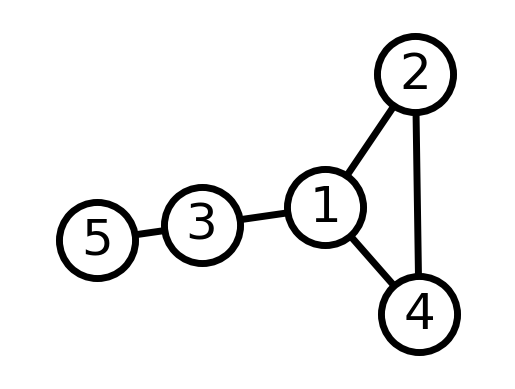

In [2]:
options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

G0 = nx.Graph()

V = {1, 2, 3, 4, 5}
E = [(1,2), (1,3), (1,4), (2,4), (3,5)]

G0.add_nodes_from(V)
G0.add_edges_from(E)

nx.draw_networkx(G0, **options)
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

## Graph definitions

In [3]:
print(f"V = {G0.nodes}")
print(f"E = {G0.edges}")
print(f"Graph Order: {G0.number_of_nodes()}")
print(f"Graph Size: {G0.number_of_edges()}")
print(f"Degree for nodes: { {v: G0.degree(v) for v in G0.nodes}}")
print(f"Neighbors for nodes: { {v: list(G0.neighbors(v)) for v in G0.nodes} }") 

V = [1, 2, 3, 4, 5]
E = [(1, 2), (1, 3), (1, 4), (2, 4), (3, 5)]
Graph Order: 5
Graph Size: 5
Degree for nodes: {1: 3, 2: 2, 3: 2, 4: 2, 5: 1}
Neighbors for nodes: {1: [2, 3, 4], 2: [1, 4], 3: [1, 5], 4: [1, 2], 5: [3]}


In [4]:
gzin = nx.Graph() # empty graph

gzin.add_node('string')
gzin.add_node(math.cos) # cosine function
f = open('temp.txt', 'w') # file handle
gzin.add_node(f) 

gzin.nodes()

NodeView(('string', <built-in function cos>, <_io.TextIOWrapper name='temp.txt' mode='w' encoding='UTF-8'>))

# 2.2. Types of graphs

## 2.2.1. Undirected

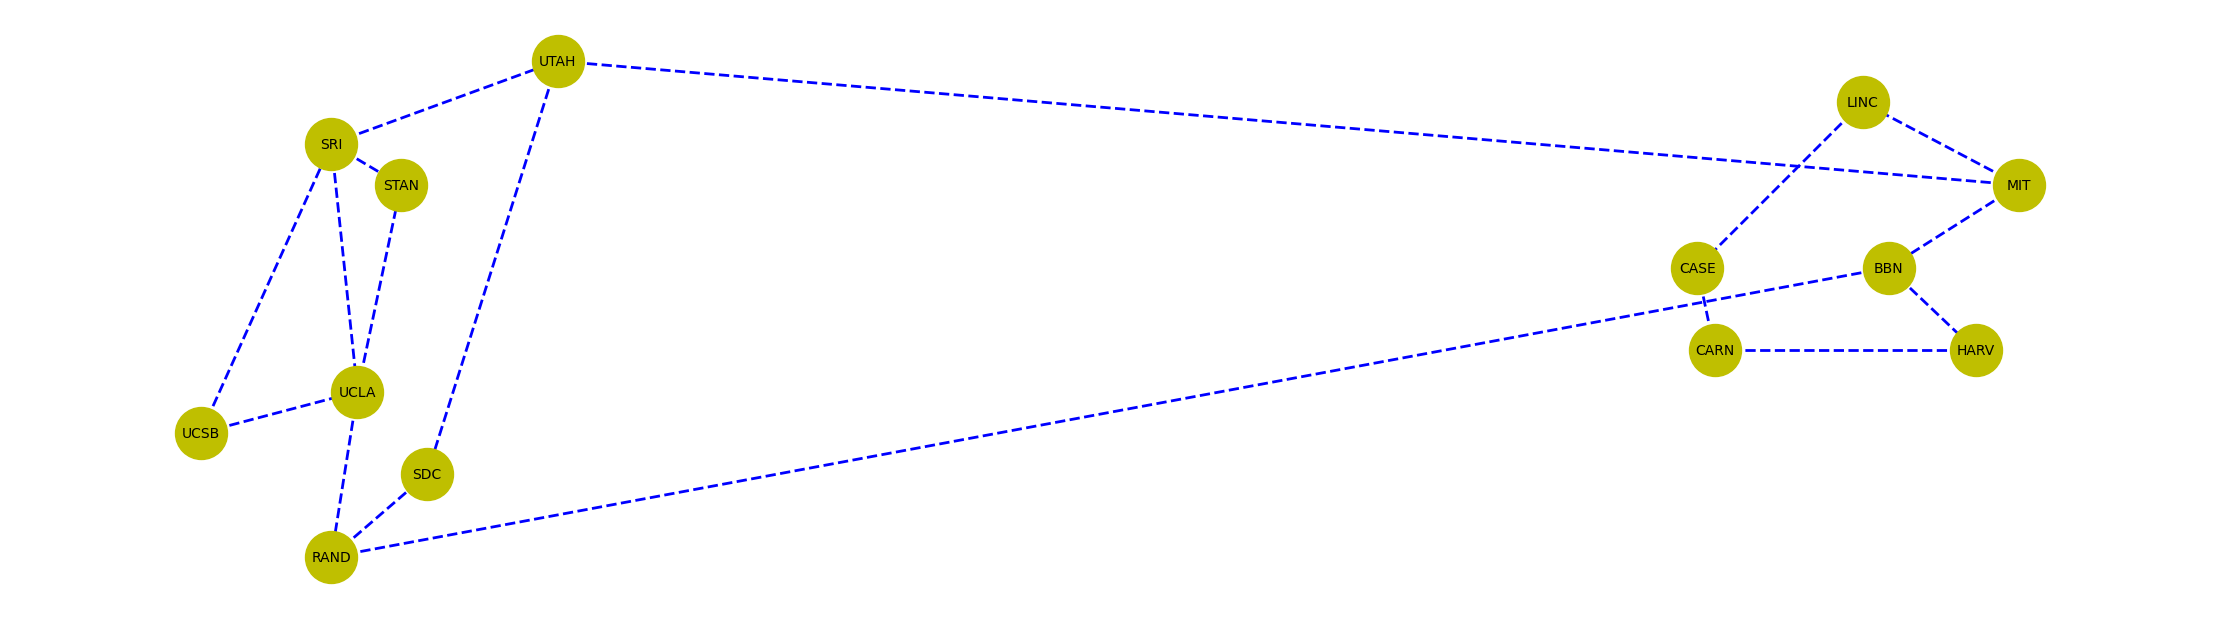

In [5]:
G1 = nx.read_adjlist("../data/arpa.adj")

opts = {"with_labels": True, "node_color": 'y', "style":"dashed", "width":2,
        "font_size": 10, "node_size": 1400, "edge_color": "b"}
pos = {
    'STAN': [2.9, 2.3], 'SRI': [2.1, 2.4], 'UCSB': [0.6, 1.7],
    'UCLA': [2.4, 1.8], 'RAND': [2.1, 1.4], 'SDC': [3.2, 1.6],
    'UTAH': [4.7, 2.6], 'BBN': [20, 2.1], 'CARN': [18, 1.9],
    'CASE': [17.8, 2.1], 'HARV': [21, 1.9], 'LINC': [19.7, 2.5],
    'MIT': [21.5, 2.3],
}

plt.figure(figsize=(22, 6))
nx.draw(G1, pos, **opts)
plt.show()

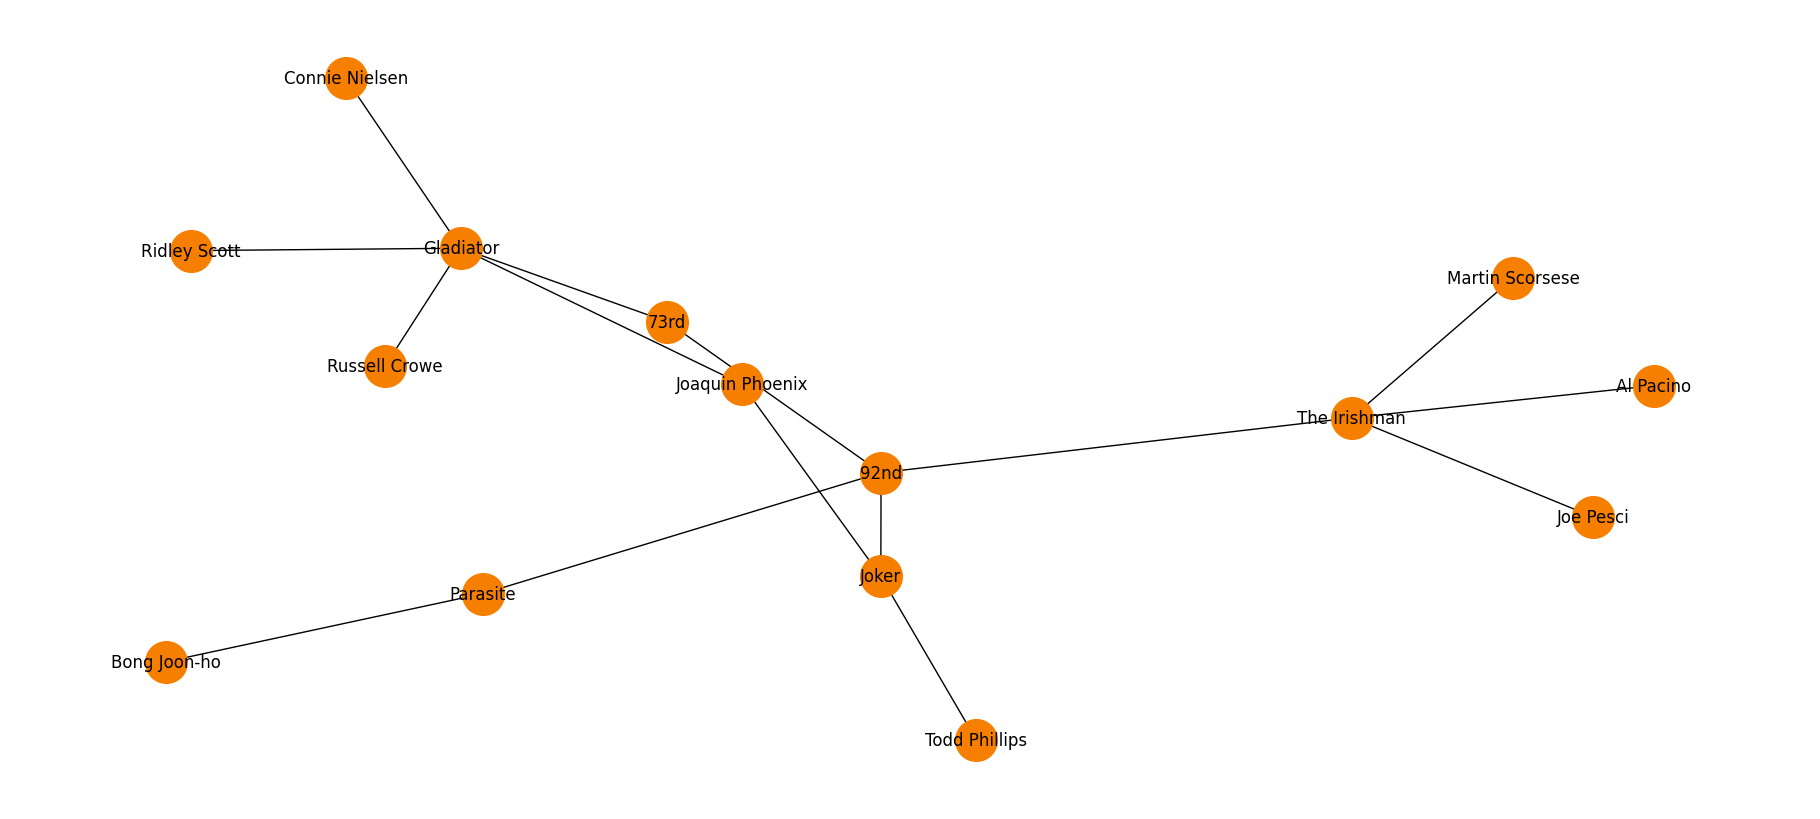

In [6]:
G2 = nx.Graph()

V = {
    "73rd", "Ridley Scott", "Russell Crowe", "Connie Nielsen", "92nd",
    "Parasite", "Bong Joon-ho", "The Irishman", "Al Pacino", "Joe Pesci",
    "Martin Scorsese", "Joaquin Phoenix", "Joker", "Todd Phillips"
}
E = [
    ("73rd", "92nd"), ("92nd", "73rd"), ("Gladiator", "73rd"),
    ("Ridley Scott", "Gladiator"), ("Joaquin Phoenix", "Gladiator"),
    ("Connie Nielsen", "Gladiator"), ("Russell Crowe", "Gladiator"),
    ("Parasite", "92nd"), ("The Irishman", "92nd"), ("Joker", "92nd"),
    ("Todd Phillips", "Joker"), ("Joaquin Phoenix", "Joker"),
    ("Bong Joon-ho", "Parasite"), ("Martin Scorsese", "The Irishman"),
    ("Al Pacino", "The Irishman"), ("Joe Pesci", "The Irishman")
]

G2.add_nodes_from(V)
G2.add_edges_from(E)

plt.figure(figsize=(18, 8))
nx.draw(G2, with_labels=True, font_family="sans-serif", node_size=900, node_color='#f77f00')
plt.show()

In [7]:
pos = nx.shell_layout(G2)
pos

{'Connie Nielsen': array([-1.00000000e+00, -8.74227766e-08]),
 '73rd': array([-0.91354543, -0.40673673]),
 'Russell Crowe': array([-0.6691305 , -0.74314487]),
 'Ridley Scott': array([-0.30901712, -0.95105648]),
 'Parasite': array([ 0.10452884, -0.99452186]),
 'Martin Scorsese': array([ 0.49999991, -0.86602545]),
 'Bong Joon-ho': array([ 0.80901724, -0.58778495]),
 'Joker': array([ 0.97814757, -0.20791176]),
 'Todd Phillips': array([0.97814751, 0.2079121 ]),
 'Joe Pesci': array([0.809017  , 0.58778524]),
 'Joaquin Phoenix': array([0.49999961, 0.86602563]),
 'Al Pacino': array([0.10452849, 0.99452192]),
 '92nd': array([-0.30901742,  0.95105636]),
 'The Irishman': array([-0.66913062,  0.74314481]),
 'Gladiator': array([-0.91354567,  0.4067362 ])}

## 2.2.2. Homogeneous and Heterogeneous

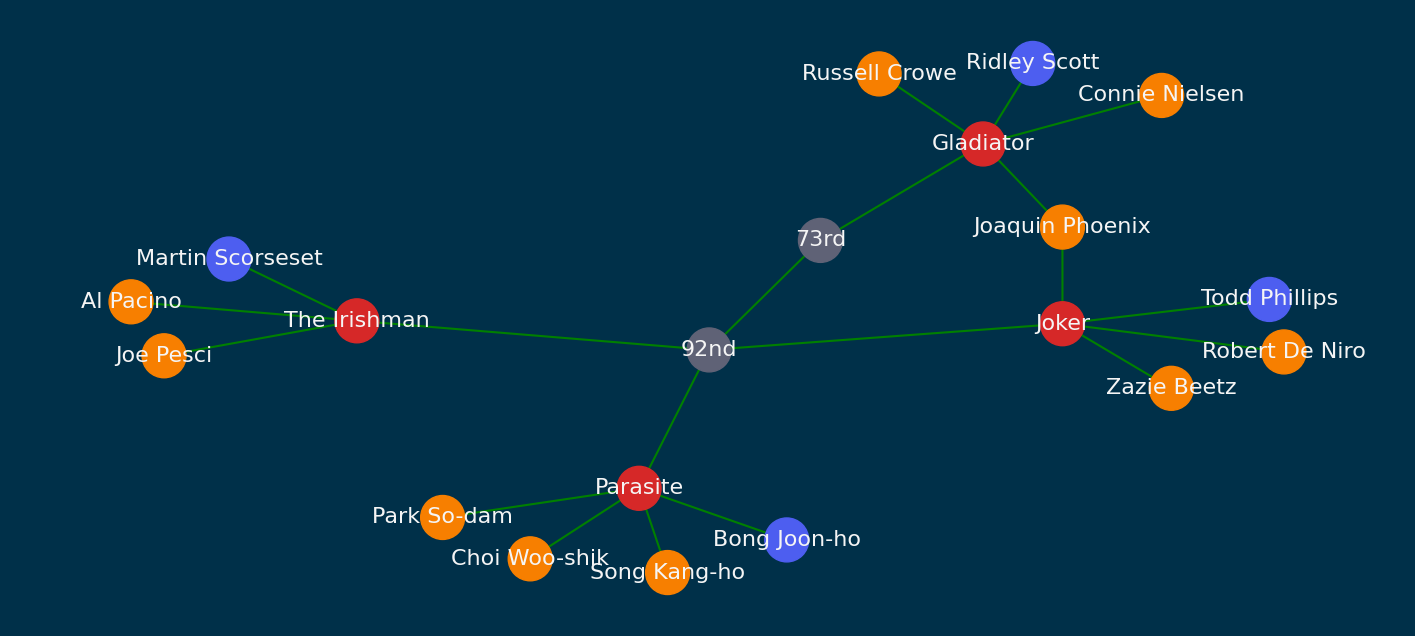

In [8]:
class OscarAward:
    def __init__(self, category: str, name: str):
        self.name = name
        self.category = category

    def __repr__(self):
        """Return the string representation of the Graph."""
        return self.name


class Award(OscarAward):
    def __init__(self, name) -> None:
        super().__init__(category="Ceremony", name=name)


class Movie(OscarAward):
    def __init__(self, name) -> None:
        super().__init__(category="Film", name=name)


class Nominee(OscarAward):
    def __init__(self, name, category) -> None:
        super().__init__(category, name=name)


G3 = nx.Graph()
act01 = Nominee(name="Joaquin Phoenix", category="Actor")
act02 = Nominee(name="Connie Nielsen", category="Actor")
act03 = Nominee(name="Russell Crowe", category="Actor")
act04 = Nominee(name="Joe Pesci", category="Actor")
act05 = Nominee(name="Al Pacino", category="Actor")
act06 = Nominee(name="Song Kang-ho", category="Actor")
act07 = Nominee(name="Choi Woo-shik", category="Actor")
act08 = Nominee(name="Park So-dam", category="Actor")
act09 = Nominee(name="Robert De Niro", category="Actor")
act10 = Nominee(name="Zazie Beetz", category="Actor")

dir01 = Nominee(name="Ridley Scott", category="Director")
dir02 = Nominee(name="Bong Joon-ho", category="Director")
dir03 = Nominee(name="Martin Scorseset", category="Director")
dir04 = Nominee(name="Todd Phillips", category="Director")

mov01 = Movie(name="Gladiator")
mov02 = Movie(name="Parasite")
mov03 = Movie(name="The Irishman")
mov04 = Movie(name="Joker")

awr73 = Award(name="73rd")
awr92 = Award(name="92nd")

G3.add_edges_from([
    (awr92, awr73), (awr73, awr92),
    (act01, mov01), (act02, mov01), (act03, mov01),
    (act06, mov02), (act07, mov02), (act08, mov02),
    (act04, mov03), (act05, mov03),
    (act01, mov04), (act09, mov04), (act10, mov04),
    (dir01, mov01), (dir02, mov02), (dir03, mov03), (dir04, mov04),
    (mov01, awr73), (mov02, awr92), (mov03, awr92), (mov04, awr92),
])

val_map = {
    'Ceremony': '#5F6276', 'Film': '#d62828', 'Actor': '#f77f00', 'Director': "#4D5EF0"
}
values = [val_map.get(node.category) for node in G3.nodes()]
labels = {n: n.name for n in G3.nodes()}

aux.plot_graph(G=G3,values=values, labels=labels, name="graph-one")

In [9]:
nodes = list(G3.nodes())

G3.nodes()

NodeView((92nd, 73rd, Joaquin Phoenix, Gladiator, Connie Nielsen, Russell Crowe, Song Kang-ho, Parasite, Choi Woo-shik, Park So-dam, Joe Pesci, The Irishman, Al Pacino, Joker, Robert De Niro, Zazie Beetz, Ridley Scott, Bong Joon-ho, Martin Scorseset, Todd Phillips))

In [10]:
print(type(nodes[0]))
print(type(nodes[3]))
print(type(nodes[5]))

print(f'{nodes[1].category: <8} - {nodes[1].name}'.format('s'))
print(f'{nodes[3].category: <8} - {nodes[3].name}'.format('s'))
print(f'{nodes[5].category: <8} - {nodes[5].name}'.format('s'))

<class '__main__.Award'>
<class '__main__.Movie'>
<class '__main__.Nominee'>
Ceremony - 73rd
Film     - Gladiator
Actor    - Russell Crowe


## 2.2.3. Digraphs

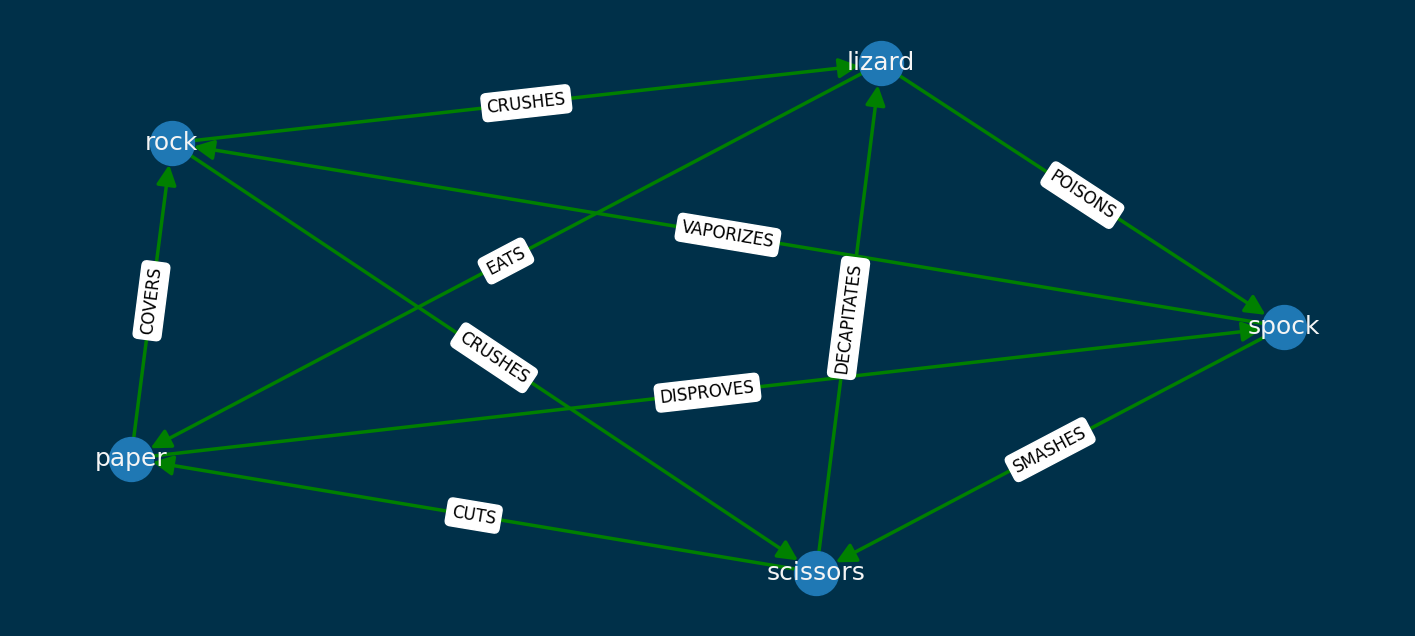

In [29]:
G4 = nx.DiGraph()

V = {"rock", "paper", "scissors", "spock", "lizard"}
E = [
    ("rock", "lizard"), ("rock", "scissors"),
    ("paper", "rock"), ("paper", "spock"),
    ("scissors", "paper"), ("scissors", "lizard"),
    ("spock", "scissors"), ("spock", "rock"),
    ("lizard", "spock"), ("lizard", "paper")
]

G4.add_nodes_from(V)
G4.add_edges_from(E)

pos = nx.spring_layout(G4)

edge_labels = {
    ('scissors', 'paper'): 'CUTS',
    ('paper', 'rock'): 'COVERS',
    ('rock', 'lizard'): 'CRUSHES',
    ('lizard', 'spock'): 'POISONS',
    ('spock', 'scissors'): 'SMASHES',
    ('scissors', 'lizard'): 'DECAPITATES',
    ('lizard', 'paper'): 'EATS',
    ('paper', 'spock'): 'DISPROVES',
    ('spock', 'rock'): 'VAPORIZES',
    ('rock', 'scissors'): 'CRUSHES'
}

opts = {
    "font_size": 18, "node_size": 1000, "font_color": "whitesmoke",
    "width": 2.5, "with_labels": True, "pos": pos, "arrowsize": 30,
    "font_family": "sans-serif", "edge_color": "green"
}

fig, ax = plt.subplots(figsize=(18, 8))
nx.draw_networkx(G4, **opts)

nx.draw_networkx_edge_labels(G4, pos=pos, edge_labels=edge_labels, font_size=12)

fig.set_facecolor('#003049')
ax.axis('off')
ax.margins(0.05)
plt.show()

In [30]:
print(f"Indegree for nodes: { {v: G4.in_degree(v) for v in G4.nodes} }")
print(f"Outdegree for nodes: { {v: G4.out_degree(v) for v in G4.nodes} }")

Indegree for nodes: {'lizard': 2, 'paper': 2, 'scissors': 2, 'spock': 2, 'rock': 2}
Outdegree for nodes: {'lizard': 2, 'paper': 2, 'scissors': 2, 'spock': 2, 'rock': 2}


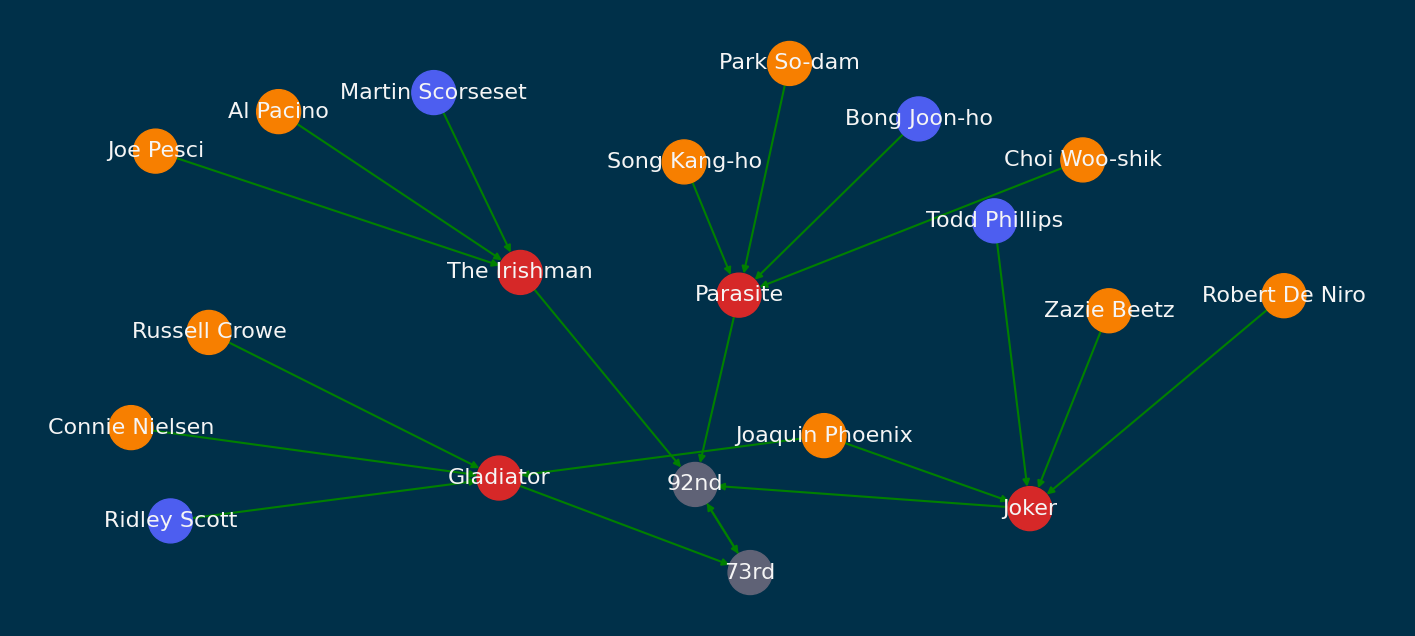

In [31]:
G5 = nx.DiGraph()

G5.add_edges_from([
    (awr92, awr73), (awr73, awr92),
    (act01, mov01), (act02, mov01), (act03, mov01),
    (act06, mov02), (act07, mov02), (act08, mov02),
    (act04, mov03), (act05, mov03),
    (act01, mov04), (act09, mov04), (act10, mov04),
    (dir01, mov01), (dir02, mov02), (dir03, mov03), (dir04, mov04),
    (mov01, awr73), (mov02, awr92), (mov03, awr92), (mov04, awr92),
])

aux.plot_graph(G=G5,values=values, labels=labels, name="graph-two")

In [32]:
print(f"Indegree for nodes: { {v: G5.in_degree(v) for v in G5.nodes} }")
print(f"Outdegree for nodes: { {v: G5.out_degree(v) for v in G5.nodes} }")

Indegree for nodes: {92nd: 4, 73rd: 2, Joaquin Phoenix: 0, Gladiator: 4, Connie Nielsen: 0, Russell Crowe: 0, Song Kang-ho: 0, Parasite: 4, Choi Woo-shik: 0, Park So-dam: 0, Joe Pesci: 0, The Irishman: 3, Al Pacino: 0, Joker: 4, Robert De Niro: 0, Zazie Beetz: 0, Ridley Scott: 0, Bong Joon-ho: 0, Martin Scorseset: 0, Todd Phillips: 0}
Outdegree for nodes: {92nd: 1, 73rd: 1, Joaquin Phoenix: 2, Gladiator: 1, Connie Nielsen: 1, Russell Crowe: 1, Song Kang-ho: 1, Parasite: 1, Choi Woo-shik: 1, Park So-dam: 1, Joe Pesci: 1, The Irishman: 1, Al Pacino: 1, Joker: 1, Robert De Niro: 1, Zazie Beetz: 1, Ridley Scott: 1, Bong Joon-ho: 1, Martin Scorseset: 1, Todd Phillips: 1}


In [33]:
nx.to_pandas_edgelist(G5).head()

,source,target
0,92nd,73rd
1,73rd,92nd
2,Joaquin Phoenix,Gladiator
3,Joaquin Phoenix,Joker
4,Gladiator,73rd


In [34]:
nx.to_pandas_adjacency(G5).head()

,92nd,73rd,Joaquin Phoenix,Gladiator,Connie Nielsen,Russell Crowe,Song Kang-ho,Parasite,Choi Woo-shik,Park So-dam,Joe Pesci,The Irishman,Al Pacino,Joker,Robert De Niro,Zazie Beetz,Ridley Scott,Bong Joon-ho,Martin Scorseset,Todd Phillips
92nd,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73rd,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Joaquin Phoenix,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Gladiator,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Connie Nielsen,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2.2.4. Multigraph

In [35]:
net= pd.read_csv('../data/sioux_falls/SiouxFalls_net.tntp', skiprows=8, sep='\t').drop(['~', ';'], axis =1)
net['edge']=net.index+1
flow=pd.read_csv('../data/sioux_falls/SiouxFalls_flow.tntp',sep='\t').drop(['From ', 'To '],axis=1)
flow.rename(columns={"Volume ": "flow", "Cost ": "cost"},inplace=True)
# Actual Sioux Falls coordinate
node_coord=pd.read_csv('../data/sioux_falls/SiouxFalls_node.tntp',sep='\t').drop([';'], axis=1)
# X,Y position for good visualization
node_xy=pd.read_csv('../data/sioux_falls/SiouxFalls_node_xy.tntp',sep='\t')

# dataframe containing all link attributes
sioux_falls_df=pd.concat([net,flow], axis=1)
sioux_falls_df

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type,edge,flow,cost
0,1,2,25900.200640,6,6,0.15,4,0,0,1,1,4494.657646,6.000816
1,1,3,23403.473190,4,4,0.15,4,0,0,1,2,8119.079948,4.008691
2,2,1,25900.200640,6,6,0.15,4,0,0,1,3,4519.079948,6.000834
3,2,6,4958.180928,5,5,0.15,4,0,0,1,4,5967.336396,6.573598
4,3,1,23403.473190,4,4,0.15,4,0,0,1,5,8094.657646,4.008587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,23,22,5000.000000,4,4,0.15,4,0,0,1,72,9626.210200,12.243138
72,23,24,5078.508436,2,2,0.15,4,0,0,1,73,7902.983927,3.759304
73,24,13,5091.256152,4,4,0.15,4,0,0,1,74,11112.394731,17.617021
74,24,21,4885.357564,3,3,0.15,4,0,0,1,75,10259.524716,11.752579


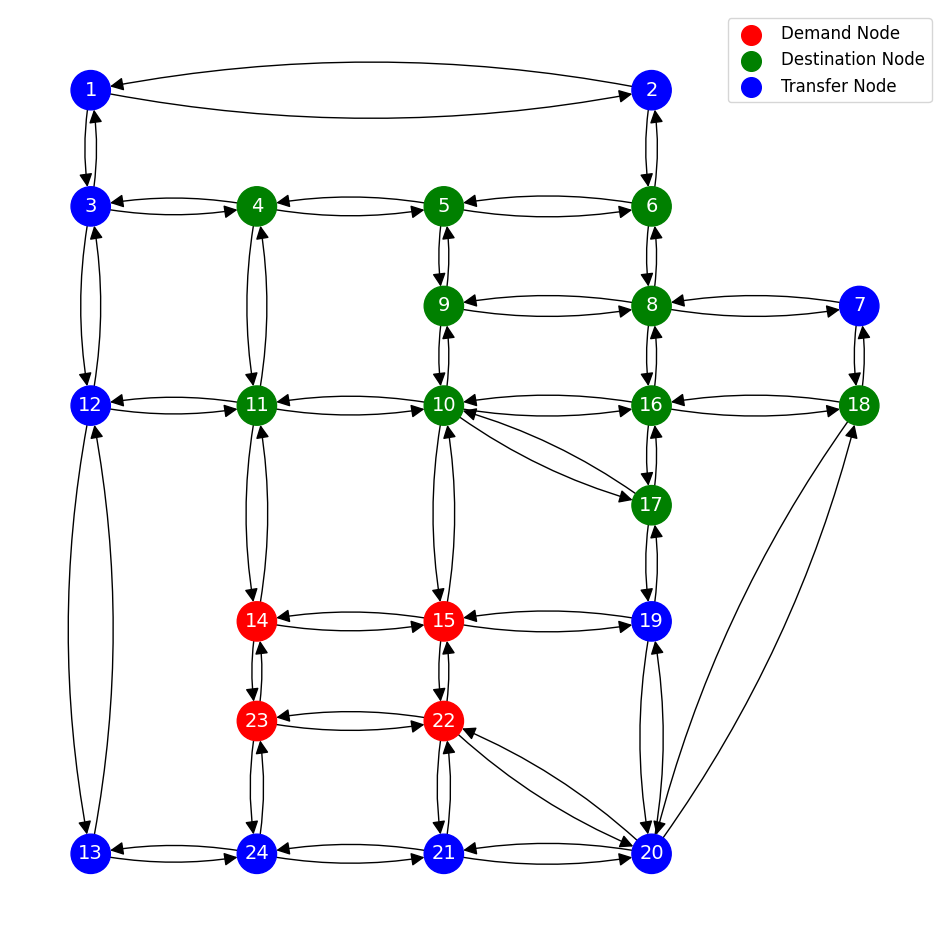

In [36]:
G6 = nx.from_pandas_edgelist(
    df=sioux_falls_df,
    source='init_node',
    target='term_node',
    edge_attr=['capacity', 'length', 'free_flow_time', 'b', 'power',
               'speed', 'toll', 'link_type', 'edge', 'flow', 'cost'],
    create_using=nx.MultiDiGraph())

# coordinate position
pos_coord = dict([(i, (a, b)) for i, a, b in zip(
    node_coord.Node, node_coord.X, node_coord.Y)])

for n, p in pos_coord.items():
    G6.nodes[n]['pos_coord'] = p

origin = [14, 15, 22, 23]
destination = [4, 5, 6, 8, 9, 10, 11, 16, 17, 18]

for n in G6.nodes:
    if n in destination:
        G6.nodes[n]['O/D'] = 'destination'
        G6.nodes[n]['color'] = 'green'
    elif n in origin:
        G6.nodes[n]['O/D'] = 'origin'
        G6.nodes[n]['color'] = 'red'
    else:
        G6.nodes[n]['O/D'] = 'transfer_node'
        G6.nodes[n]['color'] = 'blue'

# for better looking graph
pos_xy = dict(
    [(i, (a, b))
     for i, a, b in zip(node_xy.Node, node_xy.X, node_xy.Y)])

colors = [n[1]['color'] for n in G6.nodes.data()]
ax, fig = plt.subplots(figsize=(12, 12))
nx.draw_networkx(
    G6, connectionstyle='arc3, rad = 0.1',
    pos=pos_xy,
    with_labels=True,
    node_color=colors,
    arrows=True,
    arrowsize=20,
    node_size=800,
    font_color='white',
    font_size=14)

color_node_type = {'red': 'Demand Node',
                   'green': 'Destination Node', 'blue': 'Transfer Node'}
for c, n in color_node_type.items():
    fig.scatter([], [], c=c, label=n, s=200)
    fig.legend(loc='upper right', fontsize=12)

plt.axis("off")
plt.show()


## 2.2.5. Weighted graphs

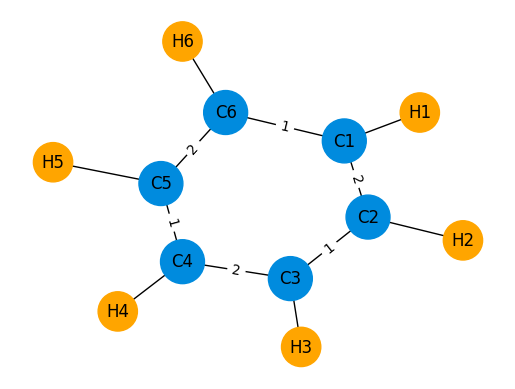

In [37]:
G7 = nx.Graph()

h_color, c_color = ("orange", "#008BDE")
# adding nodes
G7.add_nodes_from([
    ("C1", {"color": c_color, "size": 1000}), ("C2", {"color": c_color, "size": 1000}), 
    ("C3", {"color": c_color, "size": 1000}), ("C4", {"color": c_color, "size": 1000}), 
    ("C5", {"color": c_color, "size": 1000}), ("C6", {"color": c_color, "size": 1000}),
    ("H1", {"color": h_color, "size":  800}), ("H2", {"color": h_color, "size":  800}), 
    ("H3", {"color": h_color, "size":  800}), ("H4", {"color": h_color, "size":  800}), 
    ("H5", {"color": h_color, "size":  800}), ("H6", {"color": h_color, "size":  800})
])

# adding edges
G7.add_edges_from([
    ("C1", "C2", {"weight": 2}), ("C2", "C3", {"weight": 1}), 
    ("C3", "C4", {"weight": 2}), ("C4", "C5", {"weight": 1}), 
    ("C5", "C6", {"weight": 2}), ("C6", "C1", {"weight": 1}),
    ("C1", "H1"), ("C2", "H2"), ("C3", "H3"), 
    ("C4", "H4"), ("C5", "H5"), ("C6", "H6")])

colors = list(nx.get_node_attributes(G7, "color").values())
sizes = list(nx.get_node_attributes(G7, "size").values())
edge_labels = {(u, v): d.get('weight') or '' for u, v, d in G7.edges(data=True)}

#pos = nx.spring_layout(G)
pos = {
    'C1': (0.400,  0.450), 'C2': (0.510, -0.086), 'C3': (0.150, -0.519),
    'C4': (-0.350, -0.400), 'C5': (-0.450,  0.150), 'C6': (-0.150,  0.650),
    'H1': (0.750,  0.650), 'H2': (0.950, -0.250), 'H3': (0.200, -1.000),
    'H4': (-0.650, -0.750), 'H5': (-0.950,  0.300), 'H6': (-0.350,  1.150)
}

nx.draw_networkx_nodes(G7, pos, node_color=colors, node_size=sizes)
nx.draw_networkx_edges(G7, pos)
nx.draw_networkx_edge_labels(G7, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G7, pos, labels={node: node for node in G7.nodes()})

plt.axis("off")
plt.show()


In [38]:
print(nx.to_pandas_edgelist(G7))

   source target  weight
0      C1     C2     2.0
1      C1     C6     1.0
2      C1     H1     NaN
3      C2     C3     1.0
4      C2     H2     NaN
5      C3     C4     2.0
6      C3     H3     NaN
7      C4     C5     1.0
8      C4     H4     NaN
9      C5     C6     2.0
10     C5     H5     NaN
11     C6     H6     NaN


In [39]:
print(nx.to_pandas_adjacency(G7))

     C1   C2   C3   C4   C5   C6   H1   H2   H3   H4   H5   H6
C1  0.0  2.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0
C2  2.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
C3  0.0  1.0  0.0  2.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
C4  0.0  0.0  2.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
C5  0.0  0.0  0.0  1.0  0.0  2.0  0.0  0.0  0.0  0.0  1.0  0.0
C6  1.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
H1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
H2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
H3  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
H4  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
H5  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
H6  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0


In [40]:
# Grab edge list data hosted on Gist
edgelist = pd.read_csv('https://meriatblog.blob.core.windows.net/draft/gnn-intro/sleeping_edgelist_giant.csv')

# Preview edgelist
edgelist.head(5)

,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0


In [41]:
# Grab node list data hosted on Gist
nodelist = pd.read_csv('https://meriatblog.blob.core.windows.net/draft/gnn-intro/sleeping_nodelist_giant.csv')

# Preview nodelist
nodelist.head(5)

,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771


In [42]:
# Create empty graph
G8 = nx.Graph()

# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    # g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())  # deprecated after NX 1.11
    G8.add_edge(elrow[0], elrow[1], **elrow[2:].to_dict())

# Add node attributes
for i, nlrow in nodelist.iterrows():
    # g.node[nlrow['id']] = nlrow[1:].to_dict()  # deprecated after NX 1.11
    nx.set_node_attributes(G8, {nlrow['id']:  nlrow[1:].to_dict()})

print(f'# of edges: {G8.number_of_edges()}')
print(f'# of nodes: {G8.number_of_nodes()}')

# Define node positions data structure (dict) for plotting
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in G8.nodes(data=True)}

# Define data structure (list) of edge colors for plotting
edge_colors = [e[2]['color'] for e in list(G8.edges(data=True))]

# of edges: 123
# of nodes: 77


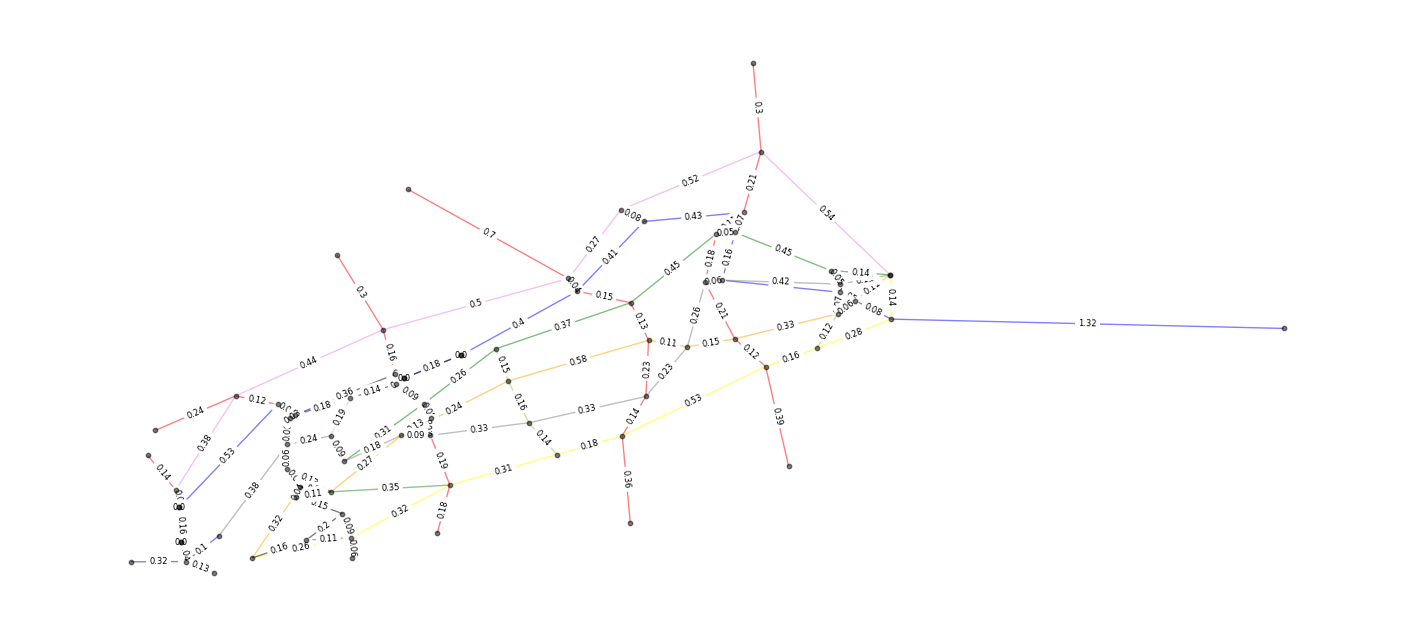

In [43]:
plt.figure(figsize=(18, 8))

edge_colors = [e[2]['color'] for e in G8.edges(data=True)]
nx.draw_networkx(G8, pos=node_positions, node_size=10, node_color='black', edge_color=edge_colors, alpha=0.5, with_labels=False)

edge_labels = {(e[0], e[1]): str(e[2]['distance']) for e in list(G8.edges(data=True))}
nx.draw_networkx_edge_labels(G8, pos=node_positions, edge_labels=edge_labels, font_size=6)

plt.axis('off')
plt.show()

In [44]:
print(nx.to_pandas_edgelist(G8))

              source           target        color  distance  estimate trail
0       rs_end_north             v_rs          red      0.30         0    rs
1               v_rs             b_rs          red      0.21         0    rs
2               v_rs             v_bv       violet      0.52         0     v
3               v_rs       v_end_east       violet      0.54         0     v
4               b_rs             g_rs          red      0.11         0    rs
..               ...              ...          ...       ...       ...   ...
118        park_east            g_gy2        green      0.14         0     g
119            g_gy1            o_gy1  yellowgreen      0.15         0   gy1
120  o_y_tt_end_west  nature_end_west        black      0.16         0    tt
121            o_gy2            y_gy2  yellowgreen      0.12         0   gy2
122      b_tt_2_dupe      b_tt_3_dupe        black      0.18         0    tt

[123 rows x 6 columns]


# Testes

In [ ]:
GT = nx.karate_club_graph()

cent = nx.centrality.betweenness_centrality(GT)
#nx.draw(GT, node_size=[v * 2000 for v in cent.values()], edge_color='silver')
nx.draw(GT, edge_color='silver')

In [45]:
G_fb = nx.read_edgelist("../data/facebook_combined.txt.gz", create_using = nx.Graph(), nodetype=int)

In [46]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size = [v * 10000 for v in betCent.values()]

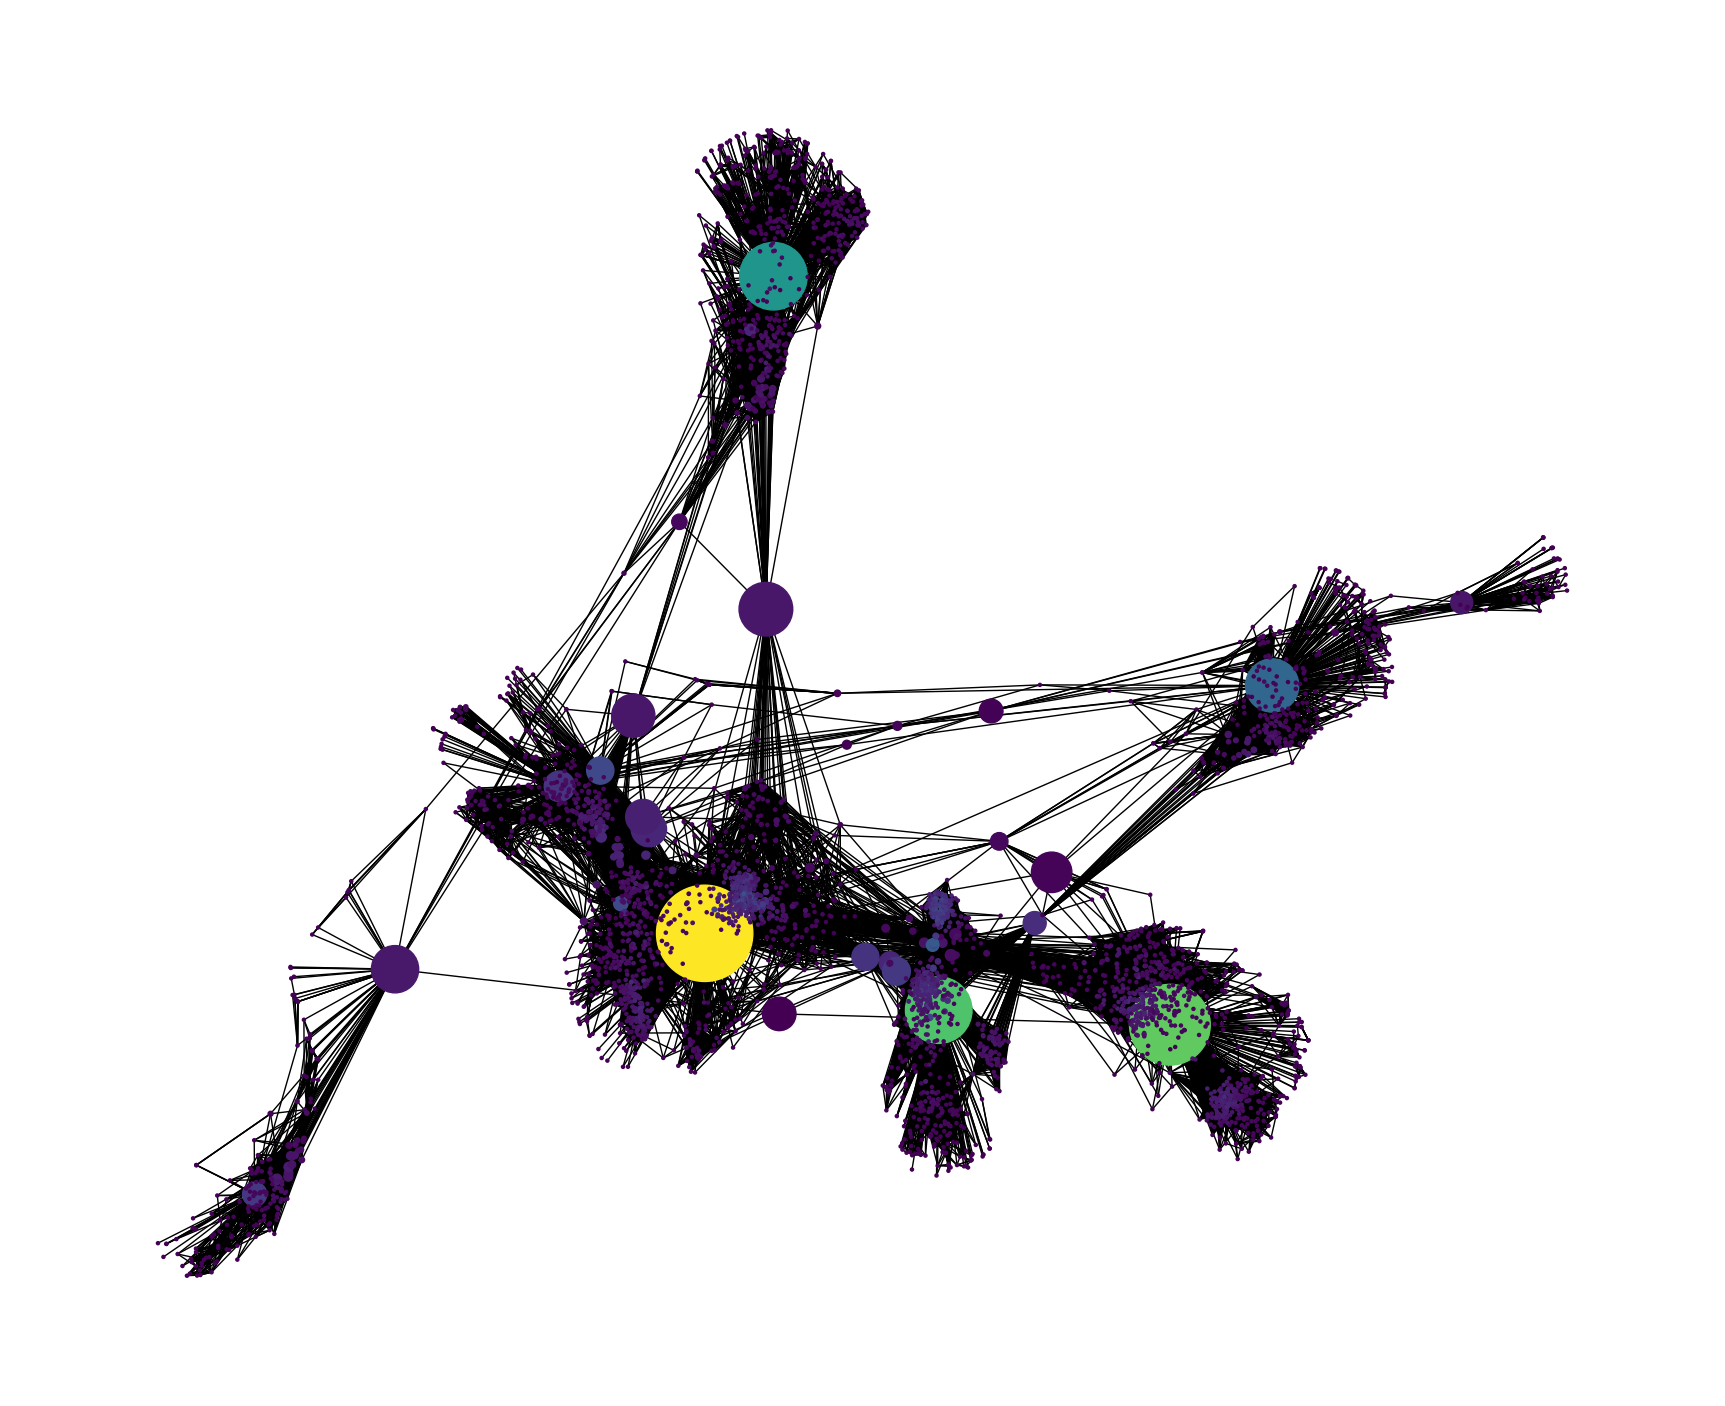

In [47]:
plt.figure(figsize=(22,18))
nx.draw_networkx(G_fb, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)
plt.axis('off')
plt.savefig('graph-fb001.png', dpi=300)
plt.show()

In [48]:
str(G_fb)

'Graph with 4039 nodes and 88234 edges'

In [49]:
# Nodes with 10 highest betweenness centrality
sorted(betCent, key=betCent.get, reverse=True)[:10]

[107, 1684, 3437, 1912, 1085, 0, 698, 567, 58, 428]

### Community detection for NetworkX’s documentation

It uses the louvain method described in Fast unfolding of communities in large networks, Vincent D Blondel, Jean-Loup Guillaume, Renaud Lambiotte, Renaud Lefebvre, Journal of Statistical Mechanics: Theory and Experiment 2008(10), P10008 (12pp)

https://python-louvain.readthedocs.io/en/latest/

https://community.wolfram.com/groups/-/m/t/498894

In [50]:
parts = cmt.best_partition(G_fb)
values = [parts.get(node) for node in G_fb.nodes()]

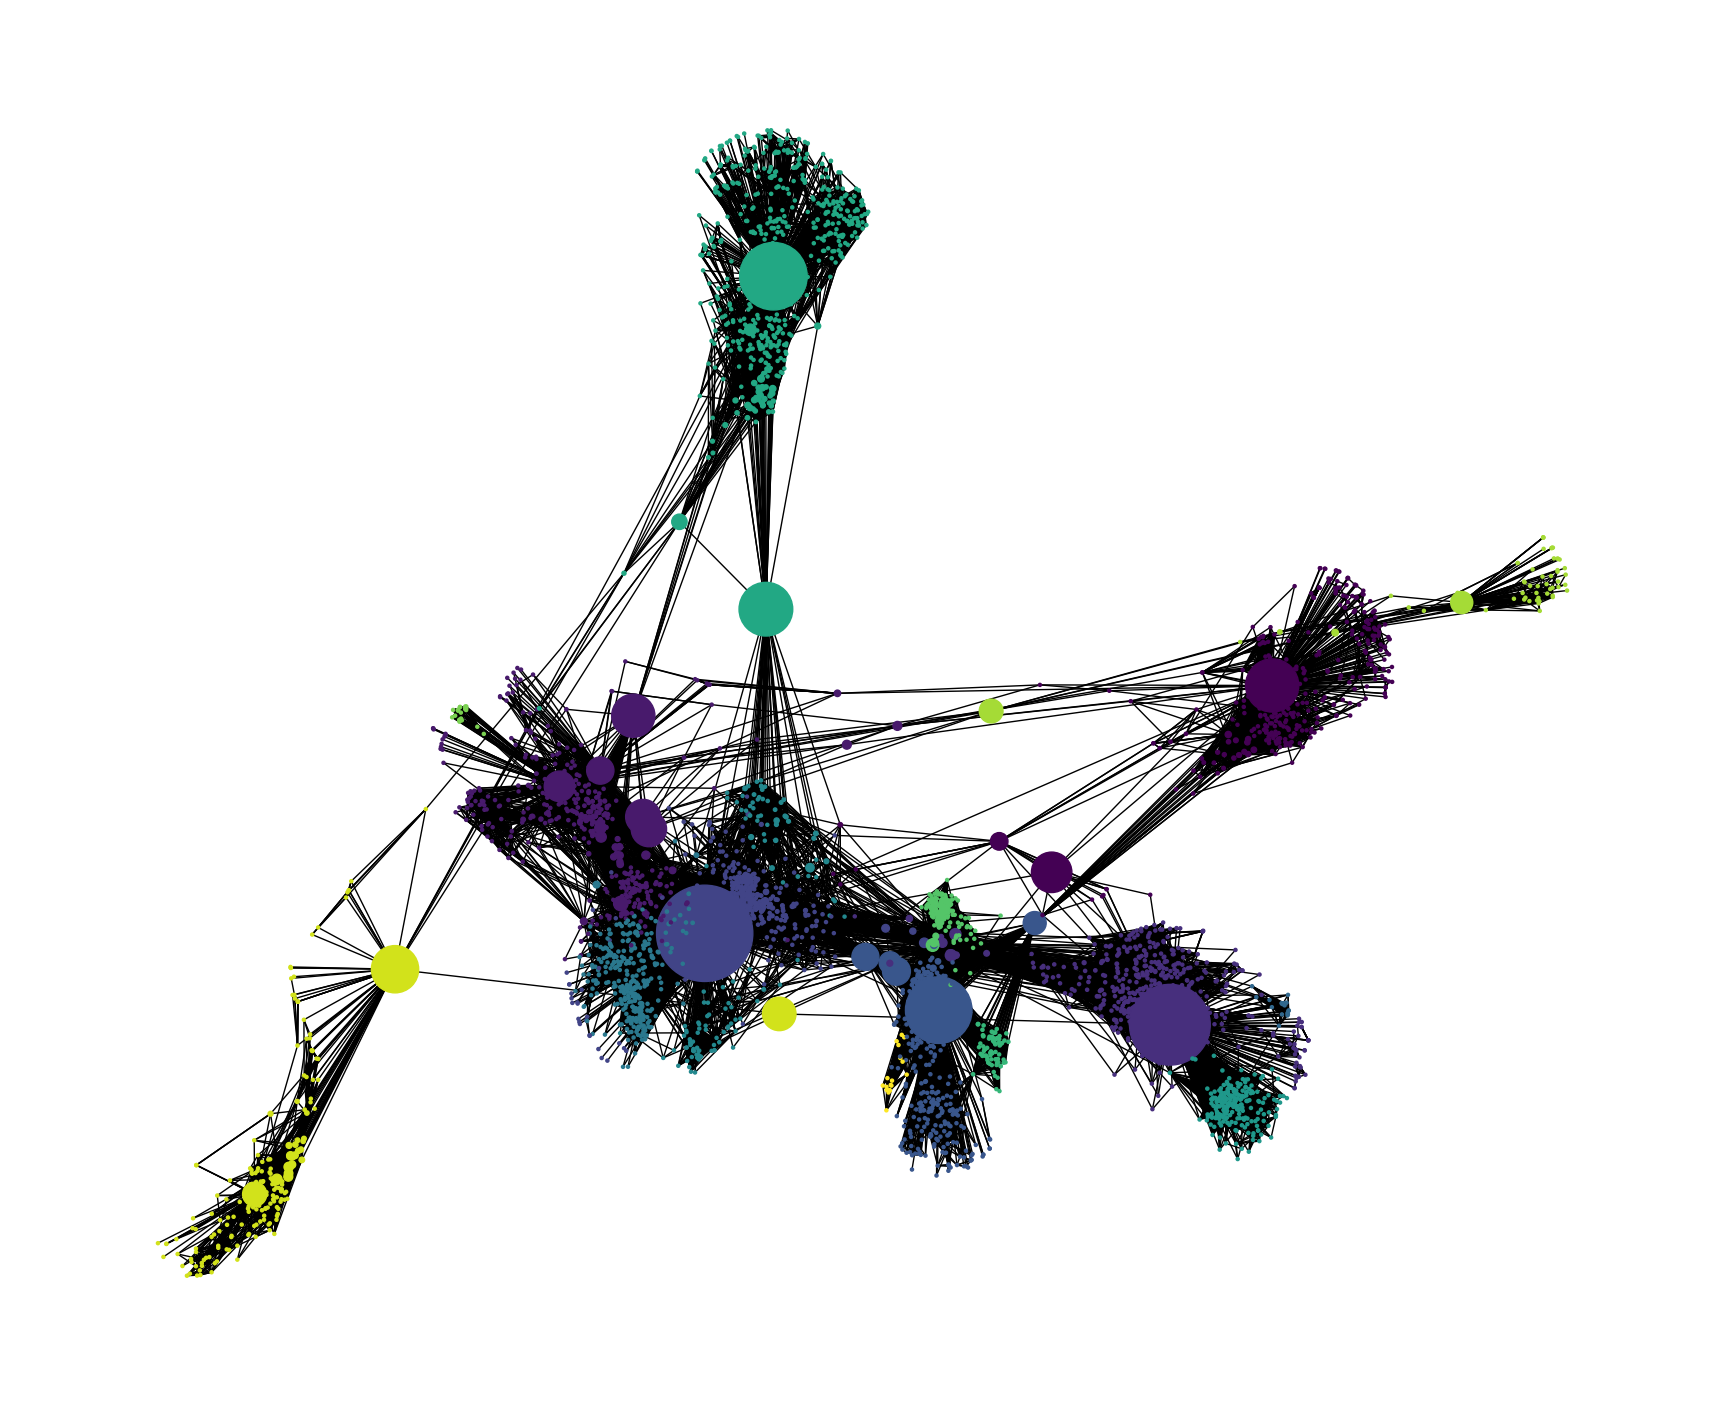

In [51]:
plt.figure(figsize=(22,18))
nx.draw_networkx(G_fb, pos=pos, with_labels=False, node_color=values, node_size=node_size)
plt.axis('off')
plt.savefig('graph-fb002.png', dpi=300)
plt.show()

In [ ]:
round_len = 5
density = round(nx.density(G_fb), round_len)
radius = round(nx.radius(G_fb), round_len)
diameter = round(nx.diameter(G_fb), round_len)
# Average shortest path length
try:
    average_shortest_path = round(
        nx.average_shortest_path_length(G_fb), round_len)
except nx.NetworkXError as e:
    average_shortest_path = str(e)

# Average Degree
G_deg = nx.degree_histogram(G_fb)
G_deg_sum = [a * b for a, b in zip(G_deg, range(len(G_deg)))]
average_degree = round(
    sum(G_deg_sum) / G_fb.number_of_nodes(), round_len)

# Betweenness centrality
k = int(float(G_fb.number_of_nodes()) / 100 * float(10))
betweenness_dict = nx.betweenness_centrality(G_fb, k=k)
# Closeness centrality
_is = 0
closeness_dict = {g: nx.closeness_centrality(G_fb, u=g) for g in _is}
# Degree centrality
degree_dict = nx.degree_centrality(G_fb)
# Eigenvector centrality
eigenvector_dict = nx.eigenvector_centrality(G_fb, max_iter=500)
# Clustering coefficient
clustering_dict = nx.clustering(G_fb)

print(density)
print(radius)
print(diameter)
print(average_shortest_path)
print(average_degree)

In [ ]:
str(G_fb)

In [52]:
GN = aux.network_statistics(G_fb)

Métricas iniciais da rede...

Graph with 4039 nodes and 88234 edges

                                 Process    Time
========================================    =========================
                                 Density     0.0032813549041748047
                                Diameter     56.55210733413696
                                  Radius     54.091403007507324
            Average shortest path length     64.19992899894714
                          Average Degree     0.0027844905853271484


In [53]:
GN

{'number_of_nodes': 4039,
 'number_of_edges': 88234,
 'density': 0.01082,
 'diameter': 8,
 'radius': 4,
 'average_shortest_path': 3.69251,
 'average_degree': 43.69101,
 'is_connected': True,
 'number_connected_components': 1}

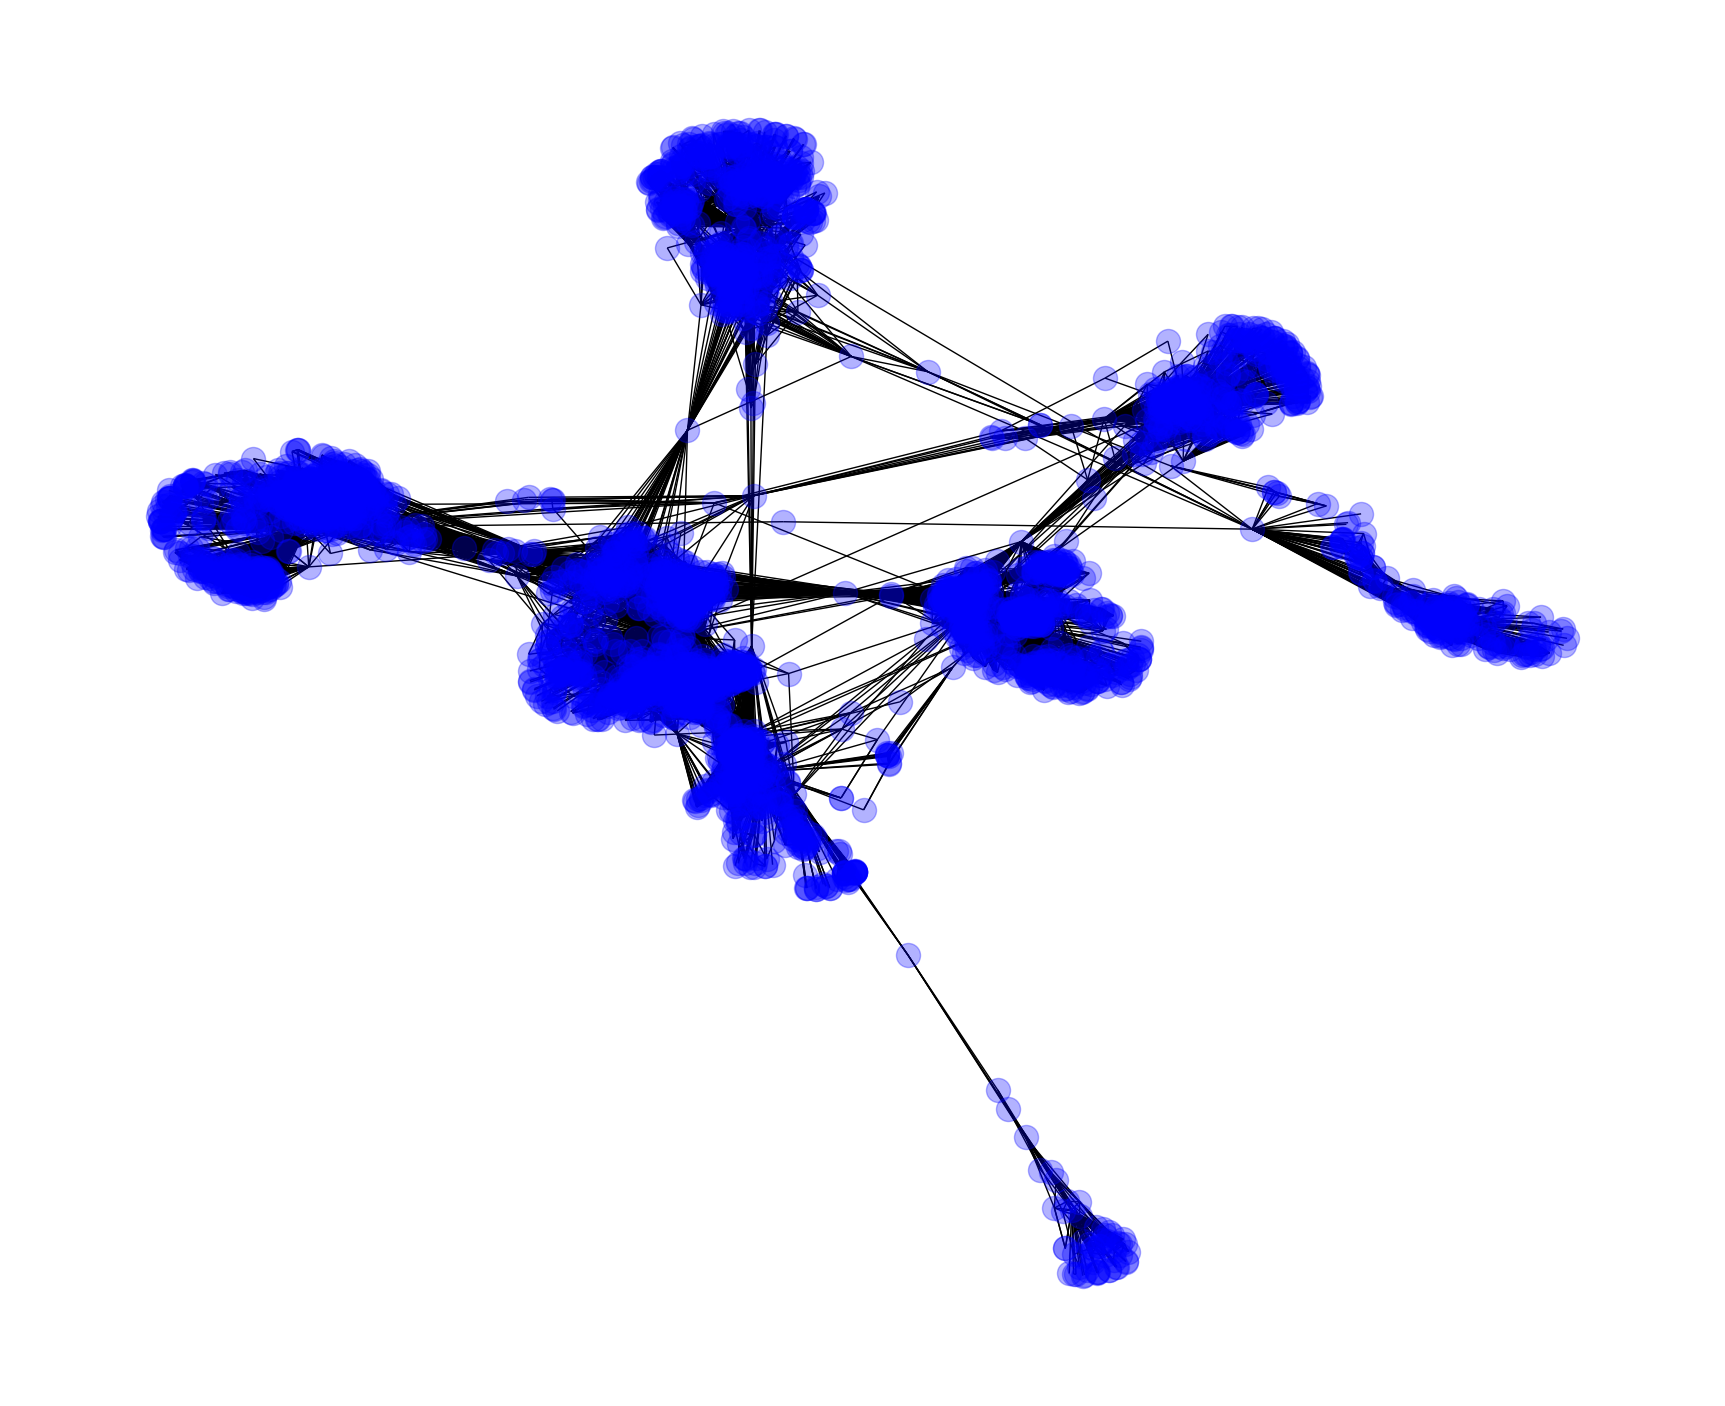

In [54]:
plt.figure(figsize=(22,18))
pos = nx.spring_layout(G_fb)
nx.draw_networkx_nodes(G_fb, pos, node_color="b", alpha=0.3)
nx.draw_networkx_edges(G_fb, pos, node_size=500)
plt.axis('off')
plt.savefig('graph-fb003.png', dpi=300)
plt.show()

In [ ]:
Gfb2 = nx.read_gexf('../data/fb2.gexf')
str(Gfb2)

In [ ]:
GN2 = aux.network_statistics(Gfb2)

In [ ]:
GN2

In [ ]:
plt.figure(figsize=(22,18))
pos = nx.spring_layout(Gfb2)
nx.draw_networkx_nodes(Gfb2, pos, node_color="b", alpha=0.3)
nx.draw_networkx_edges(Gfb2, pos, node_size=500)
plt.axis('off')
plt.show()

In [ ]:
pos = nx.spring_layout(Gfb2)
betCent = nx.betweenness_centrality(Gfb2, normalized=True, endpoints=True)
# node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size = [v * 10000 for v in betCent.values()]

In [ ]:
parts = c.best_partition(Gfb2)
values = [parts.get(node) for node in Gfb2.nodes()]

In [ ]:
plt.figure(figsize=(22,18))
nx.draw_networkx(Gfb2, pos=pos, with_labels=False, node_color=values, node_size=node_size)
plt.axis('off')
plt.show()

In [55]:
cam_net = nx.read_edgelist('../data/cambridge_net.txt', 
create_using=nx.DiGraph(), nodetype=int) 

N, K = cam_net.order(), cam_net.size() 
avg_deg = float(K) / N

In [56]:
# Find the number of nodes and edges, the average degree and the number of connected components
print("Nodes: ", N)
print("Edges: ", K)
print("Average degree: ", avg_deg)
print("SCC: ", nx.number_strongly_connected_components(cam_net))
print("WCC: ", nx.number_weakly_connected_components(cam_net))

Nodes:  912
Edges:  3496
Average degree:  3.8333333333333335
SCC:  175
WCC:  25


In [57]:
# Calculate in (and out) degrees of a directed graph

in_degrees = cam_net.in_degree() # dictionary node:degree
in_values = [v for k, v in in_degrees]
in_values_sorted = sorted(set(in_values))
in_hist = [in_values.count(x) for x in in_values_sorted]

In [58]:
out_degrees = cam_net.out_degree()
out_values = [v for k, v in out_degrees]
out_values_sorted = sorted(set(out_values))
out_hist = [out_values.count(x) for x in out_values_sorted]

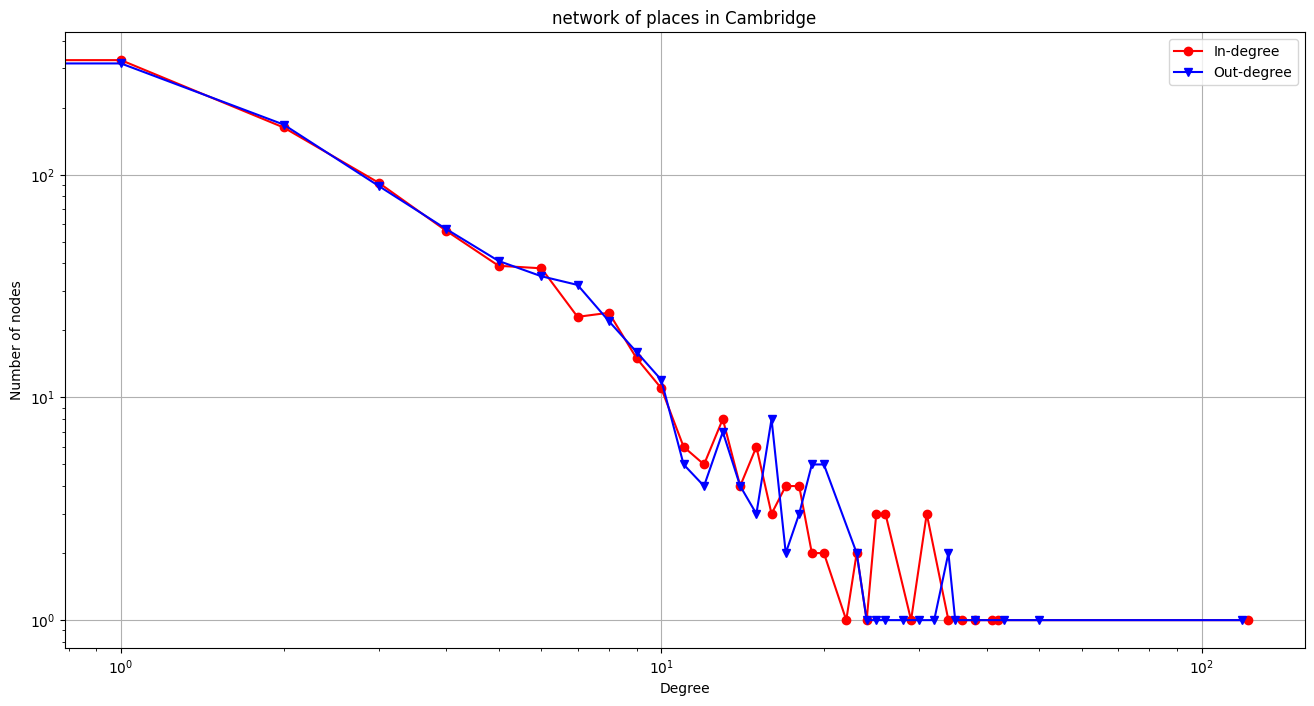

In [59]:
# Then use matplotlib (pylab) to plot the degree distribution
plt.figure(figsize=(16,8))
plt.grid(True) 
plt.loglog(in_values_sorted, in_hist, 'ro-') # in-degree 
plt.loglog(out_values_sorted, out_hist, 'bv-') # out-degree 
plt.legend(['In-degree', 'Out-degree']) 
plt.xlabel('Degree') 
plt.ylabel('Number of nodes') 
plt.title('network of places in Cambridge') 
#plt.xlim([0, 2*10**2]) 
#plt.savefig('./output/cam_net_degree_distribution.pdf') 
plt.savefig('graph-cam001.png', dpi=300)
plt.show()

In [60]:
# Basic analysis: clustering coefficient
# We can get the clustering coefficient of individual nodes or all the nodes 
#(but first we need to convert the graph to an undirected one)
cam_net_ud = cam_net.to_undirected()

# Clustering coefficient of node 0 
print(nx.clustering(cam_net_ud, 0)) 

# Clustering coefficient of all nodes (in a dictionary) 
clust_coefficients = nx.clustering(cam_net_ud)

# Average clustering coefficient 
avg_clust = sum(clust_coefficients.values()) / len(clust_coefficients)
print(avg_clust)

# Or use directly the built-in method 
print(nx.average_clustering(cam_net_ud))

# Basic analysis: node centralities
#• We will first extract the largest connected component and then compute 
#the node centrality measures

# Connected components are sorted in descending order of their size 
# cam_net_components = nx.connected_component_subgraphs(cam_net_ud)
cam_net_components = [
    cam_net_ud.subgraph(c) for c in nx.connected_components(cam_net_ud)
]
cam_net_mc = cam_net_components[0]

# Betweenness centrality 
bet_cen = nx.betweenness_centrality(cam_net_mc)

# Closeness centrality 
clo_cen = nx.closeness_centrality(cam_net_mc)

# Eigenvector centrality 
eig_cen = nx.eigenvector_centrality(cam_net_mc)

0.05990338164251208
0.15664333692446653
0.15664333692446653


In [61]:
# Basic analysis: most central nodes
#• We first introduce a utility method: given a dictionary and a threshold 
#parameter K, the top K keys are returned according to the element 
#values.

def get_top_keys(dictionary, top): 
    items = list(dictionary.items()) 
    items.sort(reverse=True, key=lambda x: x[1]) 
    return map(lambda x: x[0], items[:top])

In [62]:
# We can then apply the method on the various centrality metrics 
#available. Below we extract the top 10 most central nodes for each case.
top_bet_cen = get_top_keys(bet_cen,10) 
top_clo_cen = get_top_keys(clo_cen,10) 
top_eig_cent = get_top_keys(eig_cen,10)

In [63]:
print(list(top_bet_cen))
print(list(top_clo_cen))
print(list(top_eig_cent))

[45, 10, 14, 11, 117, 16, 55, 6, 0, 44]
[45, 10, 14, 6, 55, 16, 11, 117, 44, 172]
[45, 14, 10, 117, 6, 16, 11, 44, 55, 24]


In [66]:
cam_net_mc.nodes()

NodeView((202, 31, 789, 37, 322, 98, 296, 311, 74, 133, 670, 554, 198, 861, 203, 699, 701, 544, 543, 44, 11, 452, 224, 56, 502, 45, 93, 260, 624, 60, 268, 266, 22, 118, 459, 55, 47, 80, 446, 427, 13, 34, 0, 85, 174, 371, 163, 289, 567, 684, 210, 171, 211, 6, 168, 351, 331, 332, 349, 517, 629, 228, 911, 693, 348, 30, 114, 54, 10, 263, 19, 21, 121, 51, 122, 108, 106, 442, 368, 23, 257, 570, 569, 508, 96, 335, 551, 184, 639, 560, 25, 26, 246, 249, 440, 57, 173, 67, 46, 179, 180, 181, 269, 287, 494, 35, 126, 387, 14, 136, 61, 137, 305, 230, 189, 8, 409, 652, 16, 628, 2, 1, 469, 166, 690, 559, 316, 298, 524, 283, 386, 573, 227, 278, 833, 69, 240, 241, 488, 513, 282, 112, 116, 3, 52, 62, 160, 164, 109, 342, 466, 248, 172, 18, 24, 414, 115, 255, 77, 78, 185, 507, 597, 897, 808, 407, 496, 334, 527, 412, 153, 119, 212, 36, 324, 176, 420, 430, 157, 416, 7, 213, 667, 32, 596, 235, 339, 438, 433, 428, 845, 791, 792, 593, 884, 762, 659, 858, 522, 598, 381, 470, 155, 53, 102, 526, 600, 832, 231, 247

In [ ]:
GT = nx.karate_club_graph()

pos = nx.spring_layout(GT)
betCent = nx.betweenness_centrality(GT, normalized=True, endpoints=True)
node_size = [v * 10000 for v in betCent.values()]

parts = c.best_partition(GT)
values = [parts.get(node) for node in GT.nodes()]

In [ ]:
plt.figure(figsize=(22,18))
nx.draw_networkx(GT, pos=pos, with_labels=False, node_color=values, node_size=node_size)
plt.axis('off')
plt.show()

In [ ]:
# Create a graph and add a self-loop to node 0
G = nx.complete_graph(3, create_using=nx.DiGraph)
pos = nx.circular_layout(G)

nx.draw(G, pos, with_labels=True)

# Add self-loops to the remaining nodes
edgelist = [(0, 0), (1, 1), (2, 2)]
G.add_edges_from(edgelist)

# Draw the newly added self-loops with different formatting
nx.draw_networkx_edges(G, pos, edgelist=edgelist, arrowstyle="<|-", style="dashed")
plt.show()

**Analyze the Networks**

The resulting graph G has 2,975 nodes and 3,162 edges. It is very sparse:

* [1. Introduction](#1-introduction)
  * [1.1. Objective](#11-objective)
  * [1.2. Basic concepts](#12-basic-concepts)
  * [1.3. Notation](#13-notation)
  * [1.4. Code samples](#14-code-samples)  
* [2. Graph Theory](#2-graph-theory)
  * [2.1. Graph definitions](#21-graph-definitions)
  * [2.2. Types of graphs](#22-types-of-graphs)
    * [2.2.1. Undirected](#221-undirected)
    * [2.2.2. Homogeneous and Heterogeneous](#222-homogeneous-and-heterogeneous)
    * [2.2.3. Digraphs](#223-digraphs)
    * [2.2.4. Multigraph](#224-multigraph)
    * [2.2.5. Weighted graphs](#225-weighted-graphs)
* [3. Properties and Measures](#3-properties-and-measures)
  * [3.1 Euler's theorem](#31-eulers-theorem)
  * [3.2 Connectivity](#32-connectivity)
  * [3.3. Properties of Networks](#33-properties-of-networks)
  * [3.4. Network Measures](#34-network-measures)
  * [3.5. Code samples](#35-code-samples)
* [4. Network Distribution](#4-network-distribution)
  * [4.1 Distance Between Two Nodes](#41-distance-between-two-nodes)
  * [4.2 Degree Centrality](#42-degree-centrality)
  * [4.3 Closeness Centrality](#43-closeness-centrality)
  * [4.4 Betweenness Centrality](#44-betweenness-centrality)
  * [4.5 Eigenvector Centrality](#45-eigenvector-centrality)
  * [4.6 Eccentricity](#46-eccentricity)
  * [4.7 Density](#47-density)
  * [4.8 Code samples](#48-code-samples)
* [5. Conlusion](#5-conlusion)
* [6. References](#6-references)

# Bibliography

* [BA99] A-L Barabási and R Albert. Emergence of Scaling in Random Networks. Science. 286[5439]:509--512, 1999.
* [Bar03] A-L Barabási. Linked. Plume, New York, NY, 2003.
* [Bar54] J Barnes. Class and Committees in a Norwegian Island Parish. Human Relations. [7]:39--58, 1954.
* [BE05] U Brandis and T Erlebach. Network Analysis: Methodological Foundations. Springer, New York, NY, 2005.
* [BEJ13] SP Borgatti, MG Everett, and JC Johnson. Analyzing Social Networks. SAGE Publications, Los Angeles, CA, 2013.
* [BGL11] A-L Barabási, N Gulbahce, and J Loscalzo. Network Medicine: a Network-Based Approach to Human Disease. Nature Reviews Genetics. 12:56--58, 2011, January.
* [BGLL08] VD Blondel, J-L Guillaume, R Lambiotte, and E Lefebvre. Fast Unfolding of Communities in Large Networks. Journal of Statistical Mechanics: Theory and Experiment. [10]:P10008, 2008.
* [BKG11] M Buhrmester, T Kwang, and SD Gosling. Amazon’s Mechanical Turk: A New Source of Inexpensive, Yet High-Quality, Data?. Perspectives on Psychological Science. 1[6]:3--5, 2011.
* [BKL09] S Bird, E Klein, and E Loper. Natural Language Processing with Python. O’Reilly & Associates, Inc., Sebastopol, CA, 2009.
* [BWR17] HR Bernard, AY Wutich, and GW Ryan. Analyzing Qualitative Data. Systematic Approaches. SAGE Publications, Los Angeles, CA, 2017.
* [CF09] NA Christakis and JH Fowler. Connected. Back Bay Books, New York, NY, 2009.
* [DGG41] A Davis, BB Gardner, and MR Gardner. Deep South. University of Chicago Press, Chicago, IL, 1941.
* [Dun98] R Dunbar. Grooming, Gossip, and the Evolution of Language. Harvard University Press, Boston, MA, 1998.
* [EG12] T Eliassi-Rad and M Gupte. Measuring Tie Strength in Implicit Social Network. Proc. 4th ACM International Conference on Web Science. 2012, June.
* [EK10] D Easley and J Kleinberg. Networks, Crowds, and Markets. Reasoning about a Highly Connected World. Cambridge University Press, Cambridge, United Kingdom, 2010.
* [Gra73] M Granovetter. The Strength of Weak Ties. American Journal of Sociology. 78[6]:1360--1380, 1973, May.
* [Gra83] M Granovetter. The Strength of Weak Ties: a Network Theory Revisited. Sociological Theory. 1:201--233, 1983.
* [GZ17] S Gantman and D Zinoviev. Conceptual Structure of Fraud Research and Its Dynamics. Proc. AMCIS2017 on Accounting Information Systems. [4], 2017, August.
* [HSZL17] HB Hodgdon, MK Suvak, D Zinoviev, R Liebman, and EC Briggs. Network Analysis of Exposure to Trauma and Adverse Events in a Clinical Sample of Children and Adolescents. Under review. 2017.
* [Jac08] M Jackson. Social and Economic Networks. Princeton University Press, Princeton, NJ, 2008.
* [KJFC15] J Krause, R James, D Franks, and D Croft. Animal Social Networks. Oxford University Press, New York, NY, 2015.
* [Kov10] B Kovacs. A Generalized Model of Relational Similarity. Social Networks. 32[3]:197--211, 2010.
* [KY08] D Knoke and S Yang. Social Network Analysis. SAGE Publications, Los Angeles, CA, Second edition, 2008.
* [Lew09] TG Lewis. Network Science. Theory and Applications. John Wiley & Sons, New York, NY, 2009.
* [Mor34] JL Moreno. Who Shall Survive?. Beacon House, New York, NY, 1934.
* [New06] MEJ Newman. Modularity and Community Structure in Networks. Proc. National Academy of Sciences of the United States of America. 103[23]:8577--8696, 2006.
* [New10] MEJ Newman. Networks: An Introduction. Oxford University Press, New York, NY, 2010.
* [NMB11] W de Nooy, A Mrvar, and V Batagelj. Exploratory Social Network Analysis with Pajek (Structural Analysis in the Social Sciences). Cambridge University Press, Cambridge, United Kingdom, Expanded edition, 2011.
* [PBMW99] L Page, S Brin, R Motwani, and T Winograd. The PageRank Citation Ranking: Bringing Order to the Web. Stanford InfoLab. 1999.
* [PDFV05] G Palla, I Derenyi, I Farkas, and T Vicsek. Uncovering the Overlapping Community Structure of Complex Networks in Nature and Society. Nature. 435:814--818, 2005.
* [RW99] R Read and R Wilson. An Atlas of Graphs. Oxford University Press, New York, NY, 1999.
* [Sco00] J Scott. Social Network Analysis: A Handbook. SAGE Publications, Los Angeles, CA, Second edition, 2000.
* [Str01] S Strogatz. Exploring Complex Networks. Nature. 410[6825]:268--276, 2001.
* [Wat03] D Watts. Six Degrees. The Science of a Connected Age. W. W. Norton & Company, New York, NY, 2003.
* [Zin16] D Zinoviev. Data Science Essentials in Python. The Pragmatic Bookshelf, Raleigh, NC, 2016.
* [ZLZ15] D Zinoviev, K Li, and Z Zhu. Building Mini-Categories in Product Networks. Complex Networks VI. 597:179--189, 2015.